 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_returns = Path ("Resources/whale_returns.csv")

In [3]:
whale_returns_df = pd.read_csv(whale_returns, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [4]:
# Reading whale returns
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_returns = Path ("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns, parse_dates=True, index_col="Date", infer_datetime_format=True)
algo_returns_df.columns = ["ALGORITHM 1", "ALGORITHM 2"]

In [8]:
# Count nulls
algo_returns_df.isnull().sum()

ALGORITHM 1    0
ALGORITHM 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

ALGORITHM 1    0
ALGORITHM 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
sp_closing_path= Path("Resources/sp_tsx_history.csv")
sp_closing_df=pd.read_csv(sp_closing_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_closing_df.sort_index()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [11]:
# Check Data Types
sp_closing_df.dtypes


Close    object
dtype: object

In [12]:
# Fix Data Types
sp_closing_df["Close"] = sp_closing_df["Close"].str.replace("[$,]","").astype(float)
sp_closing_df

/Users/petertran/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [13]:
# Calculate Daily Returns
sp_returns_df = sp_closing_df.pct_change()
sp_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [14]:
# Drop nulls
sp_returns_df = sp_returns_df.dropna()
sp_returns_df.isnull().sum()

Close    0
dtype: int64

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_returns_df=sp_returns_df.rename(columns = {"Close":"S&P TSX 60"})
sp_returns_df.head()


,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
returns_df = pd.concat([whale_returns_df,algo_returns_df, sp_returns_df], axis="columns", join="inner")
returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGORITHM 1,ALGORITHM 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

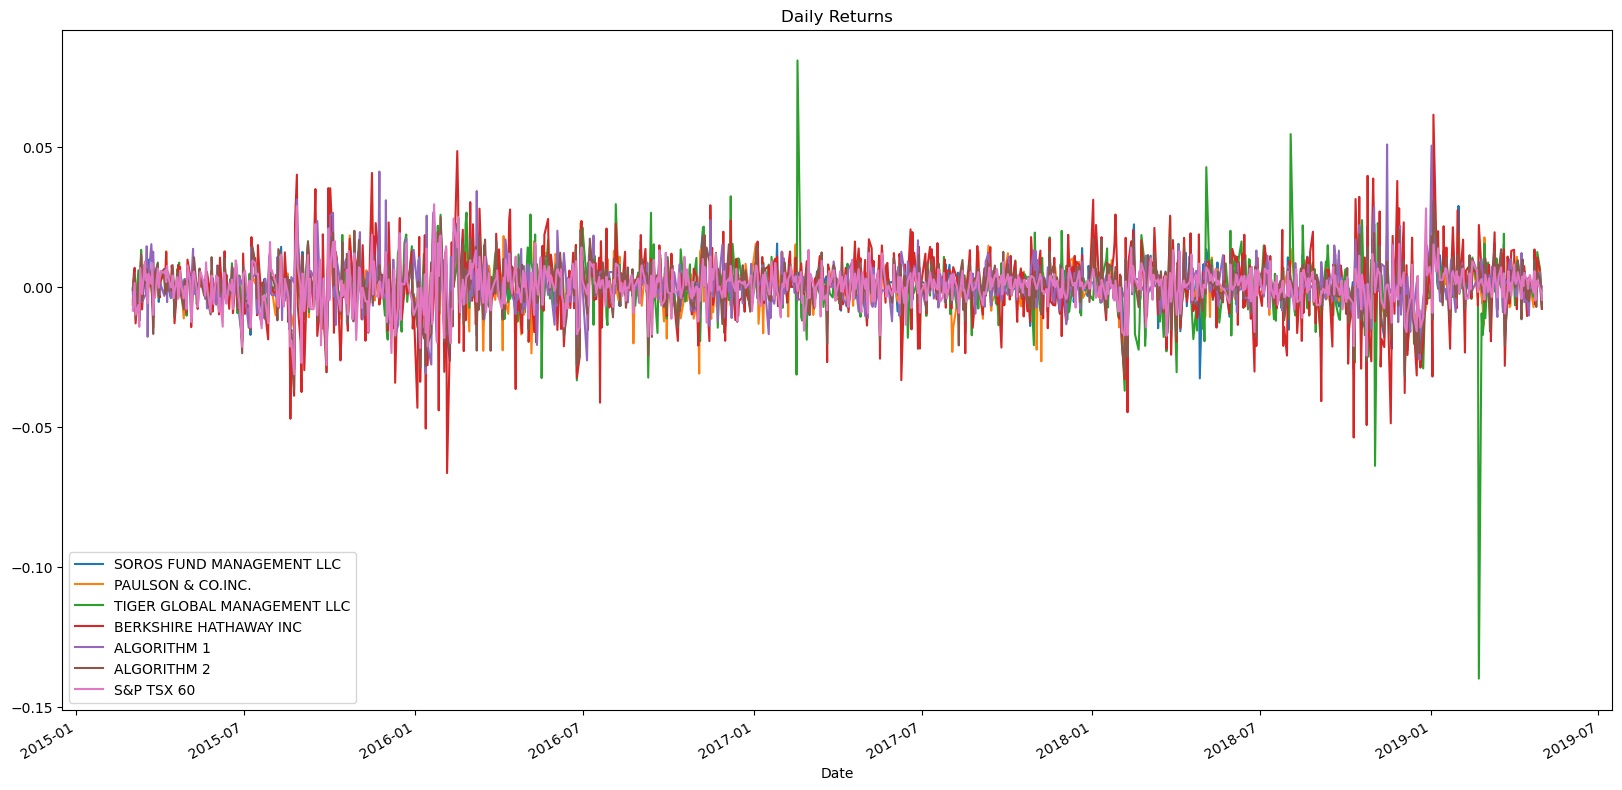

In [29]:
# Plot daily returns of all portfolios
all_daily_returns = returns_df.plot(title = "Daily Returns", figsize=(20,10))

# Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

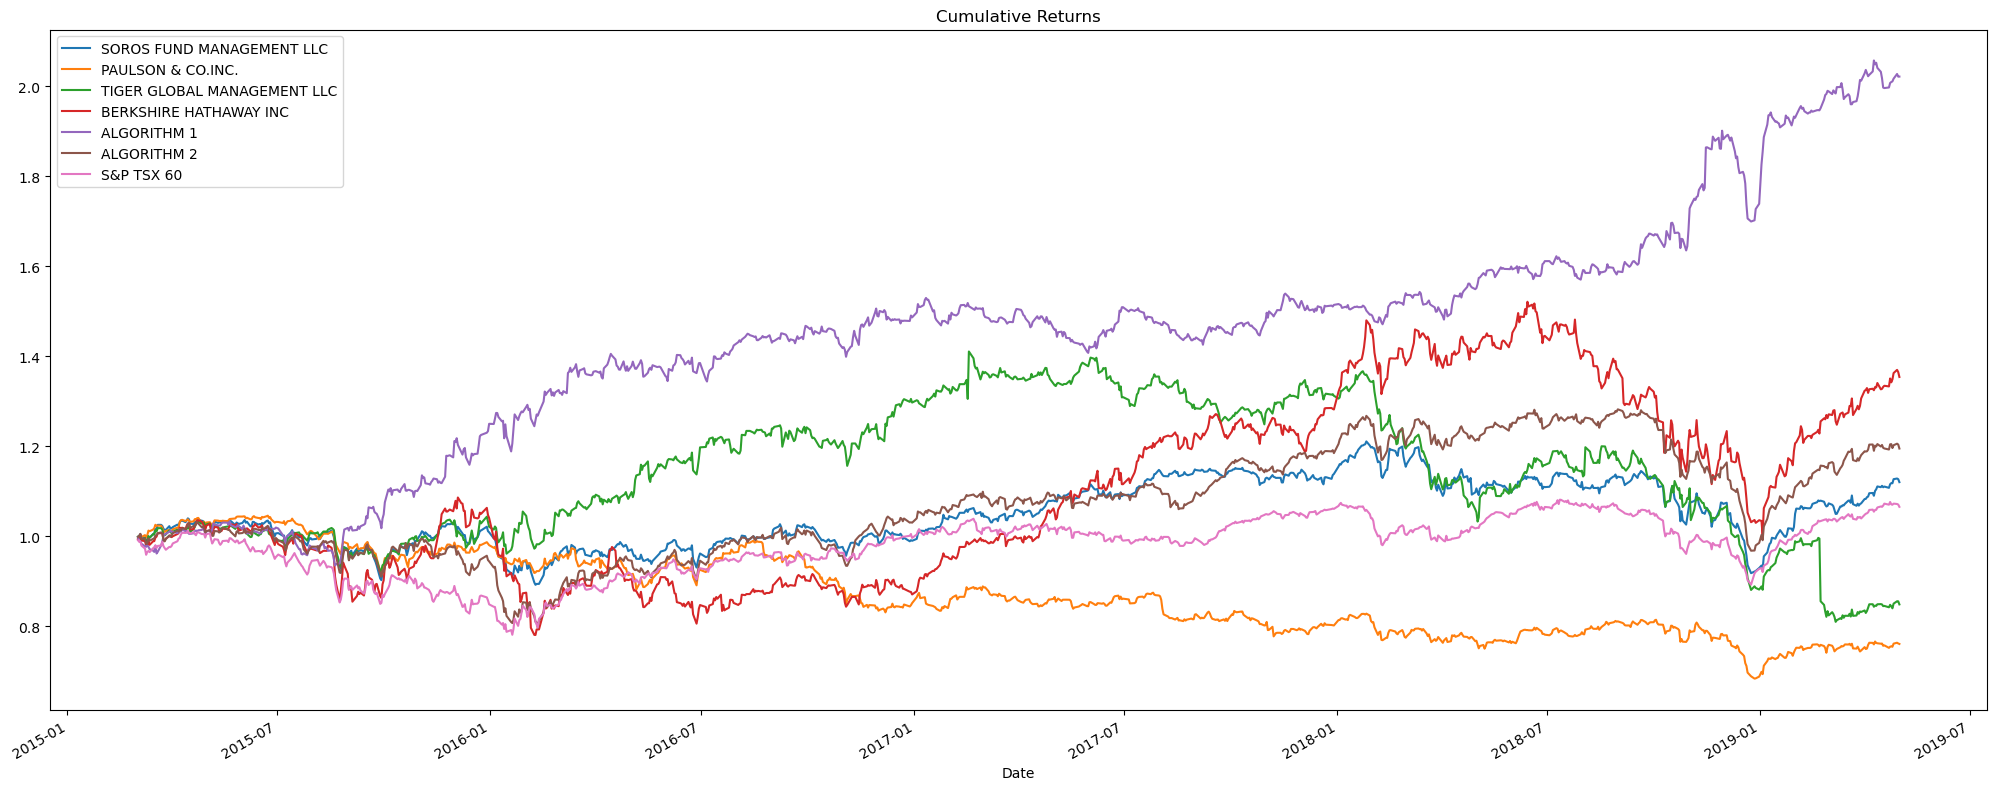

In [18]:
# Calculate cumulative returns of all portfolios
cumalative_returns = (1 + returns_df).cumprod()
# Plot cumulative returns
cumalative_returns.plot(figsize = (25,10), title="Cumulative Returns")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


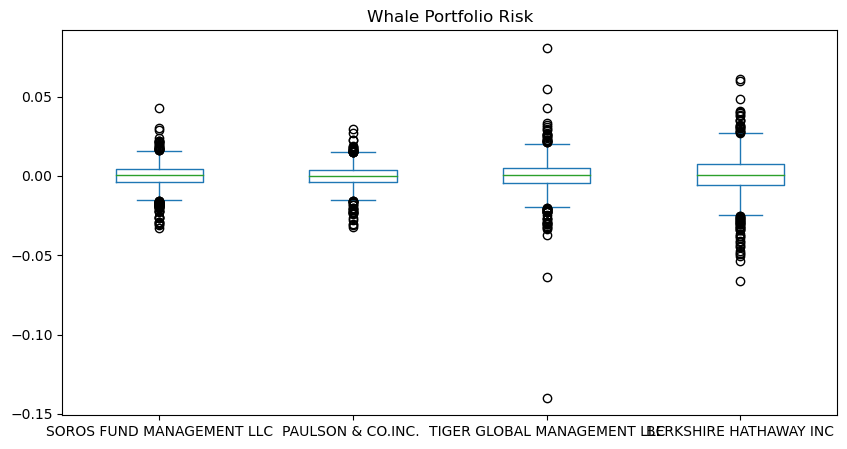

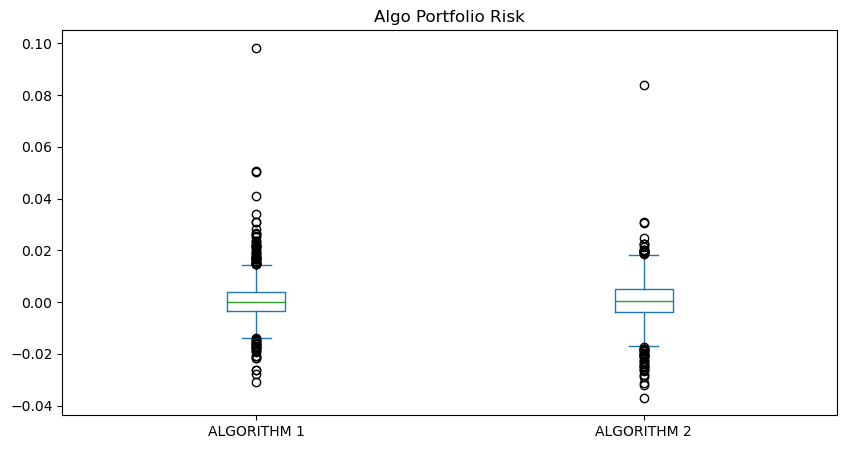

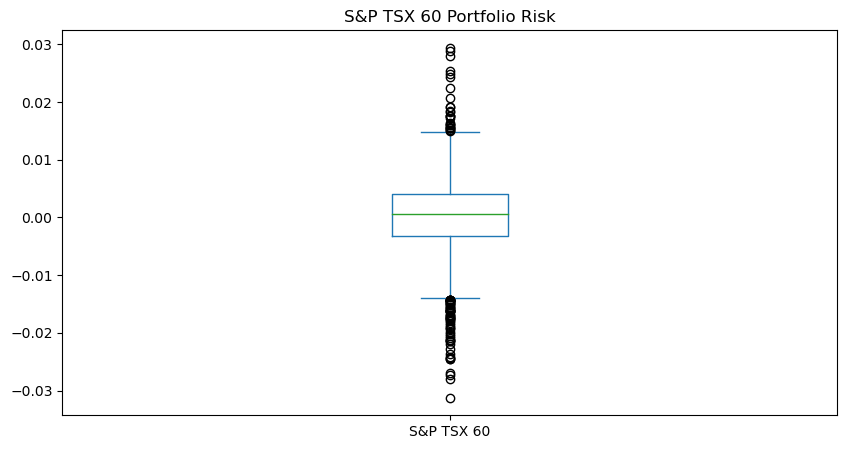

In [19]:
# Box plot to visually show risk

whale_boxplot = whale_returns_df.plot.box(figsize = (10,5), title = "Whale Portfolio Risk")
algo_boxplot = algo_returns_df.plot.box(figsize = (10,5), title = "Algo Portfolio Risk")
sp_boxplot = sp_returns_df.plot.box(figsize = (10,5), title = "S&P TSX 60 Portfolio Risk")


### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
all_returns_std = returns_df.std()
all_returns_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
ALGORITHM 1                    0.007589
ALGORITHM 2                    0.008326
S&P TSX 60                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_std = all_returns_std["S&P TSX 60"]
#Determine which portfolios are riskier than the S&P TSX 60
index=0
for risk in all_returns_std:
    if risk > sp_std:
        print(f"The {all_returns_std.index[index]} Portfolio has greater risk than S&P TSX 60")
    index+= 1


The SOROS FUND MANAGEMENT LLC Portfolio has greater risk than S&P TSX 60
The TIGER GLOBAL MANAGEMENT LLC Portfolio has greater risk than S&P TSX 60
The BERKSHIRE HATHAWAY INC Portfolio has greater risk than S&P TSX 60
The ALGORITHM 1 Portfolio has greater risk than S&P TSX 60
The ALGORITHM 2 Portfolio has greater risk than S&P TSX 60


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std = all_returns_std*np.sqrt(252)
annualised_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
ALGORITHM 1                    0.120470
ALGORITHM 2                    0.132177
S&P TSX 60                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21 Day STD'}, xlabel='Date'>

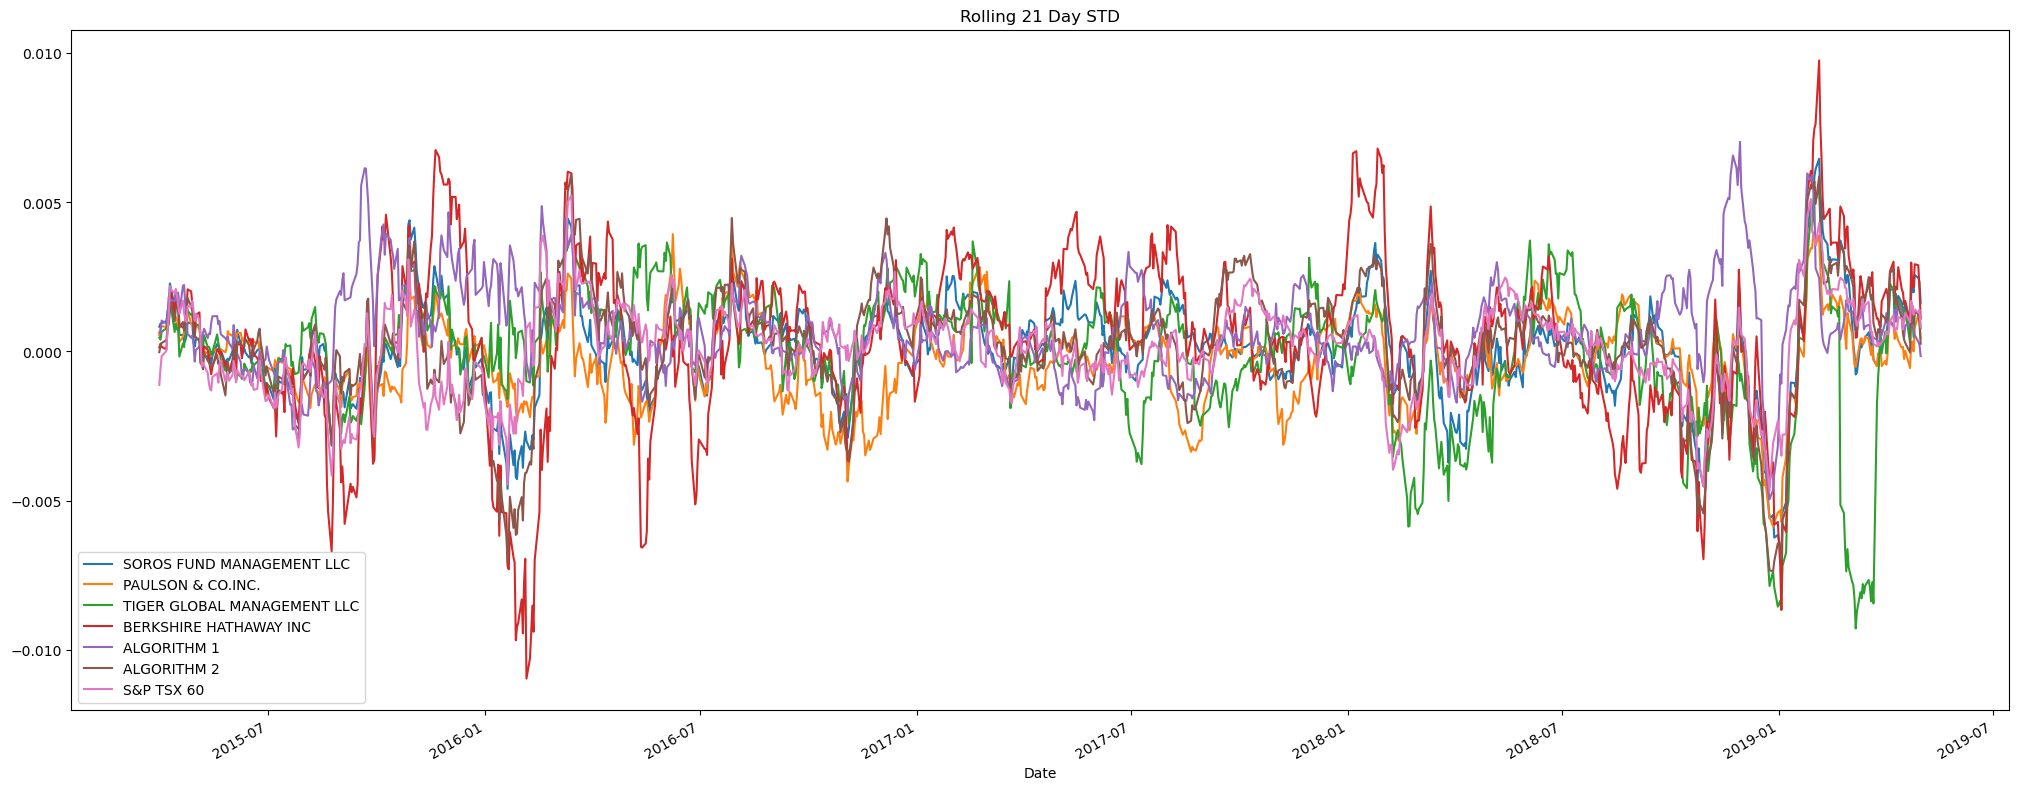

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_all_returns_std = returns_df.rolling(window=21).mean()
# Plot the rolling standard deviation
rolling_all_returns_std.plot(figsize=(25,10), title ="Rolling 21 Day STD")

### Calculate and plot the correlation

<AxesSubplot:title={'center':'Correlation of Combined Portfolios'}>

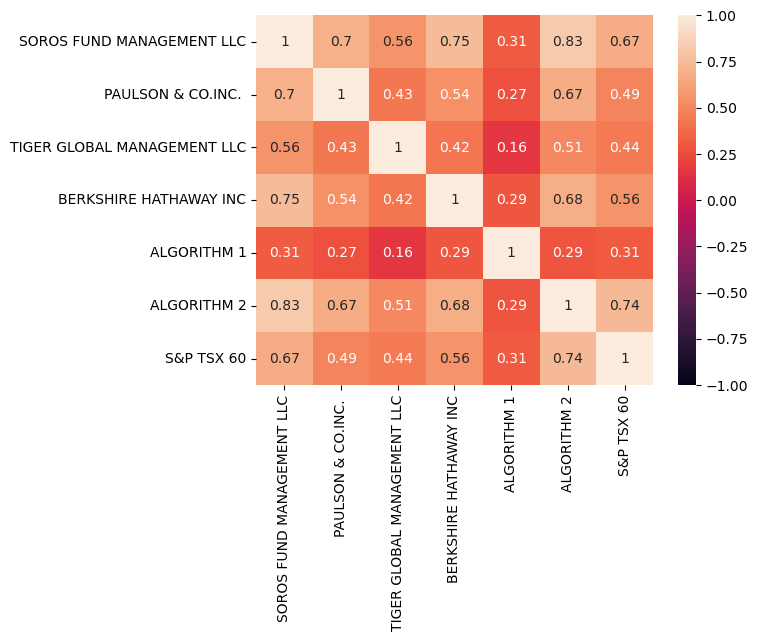

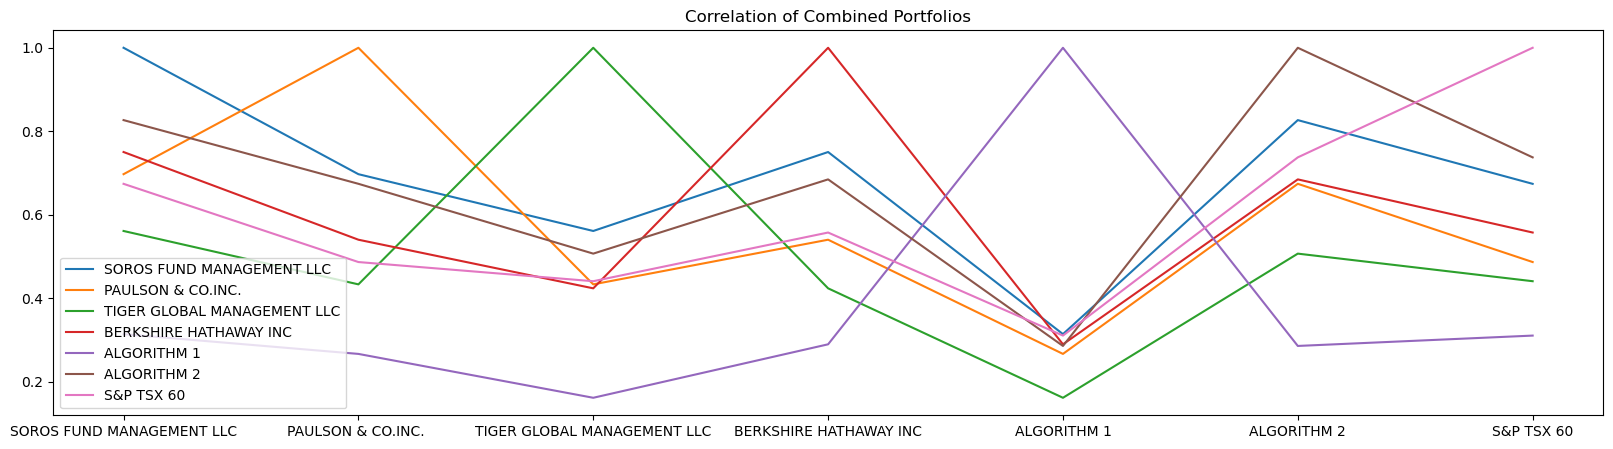

In [31]:
# Calculate the correlation
correlation = returns_df.corr()

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
correlation.plot(figsize =(20,5), title = "Correlation of Combined Portfolios")

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Beta Trend for Tiger Global Management LLC'}, xlabel='Date'>

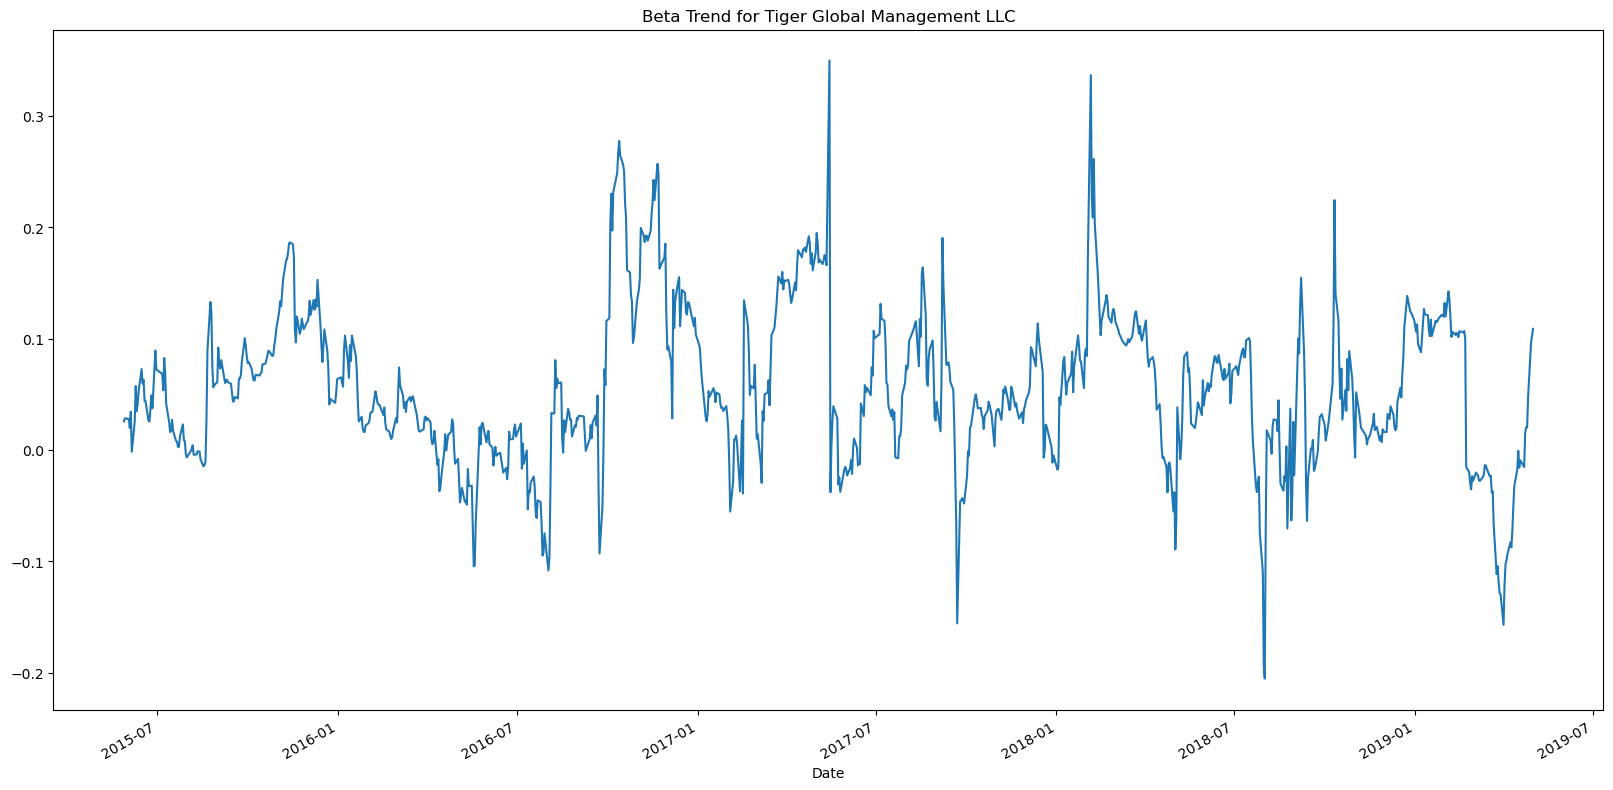

In [55]:
# Calculate covariance of a single portfolio
covariance_tiger = returns_df["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(cumalative_returns["S&P TSX 60"])
# Calculate variance of S&P TSX
variance_sp = cumalative_returns["S&P TSX 60"].rolling(window=60).var()
# Computing beta
beta = covariance_tiger / variance_sp
# Plot beta trend
beta.plot(figsize=(20,10), title="Beta Trend for Tiger Global Management LLC")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

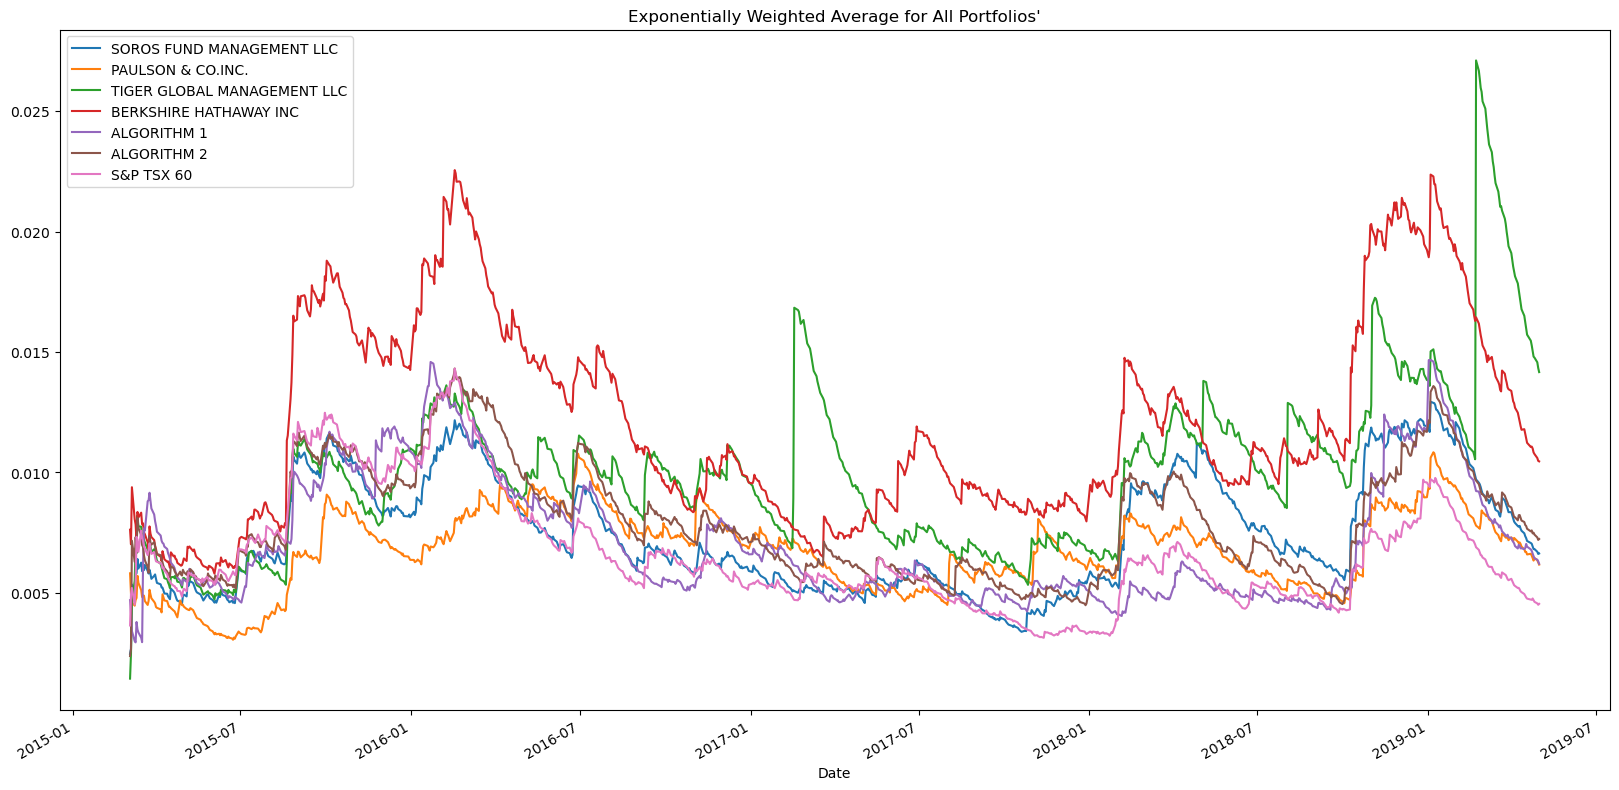

In [53]:
# Use `ewm` to calculate the rolling window
rolling_ewm = returns_df.ewm(halflife=21).std().plot(figsize=(20,10), title = "Exponentially Weighted Average for All Portfolios'")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [59]:
# Annualized Sharpe Ratios
sharpe_ratios = (returns_df.mean() *252)/(all_returns_std * np.sqrt(252))       
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
ALGORITHM 1                    1.491514
ALGORITHM 2                    0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

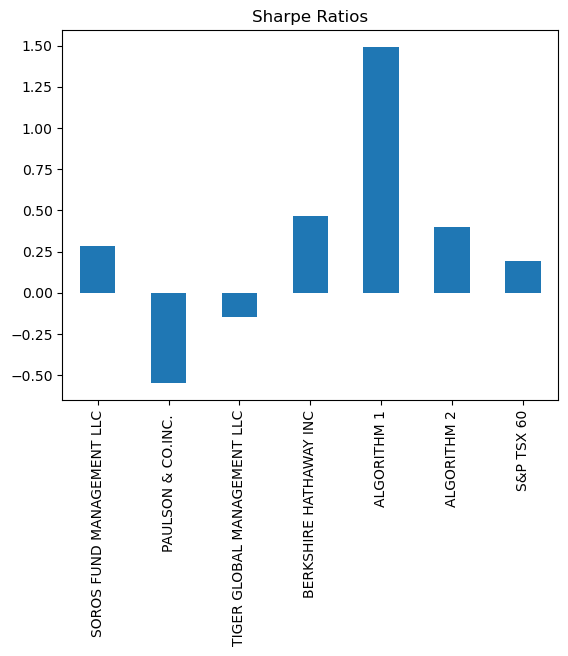

In [61]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

According to the Sharpe Ratio's caclculated above, Algorithm Portfolios 1 & 2 out performed the market and whale portfolios.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!